In [213]:
import numpy as np
import math 
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
from collections import deque
from imagetools import assignment6 as im6
import imagetools as im

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 15

In [214]:
def udwt(x, J, h, g):
    if J == 0:
        return x[:, :, np.newaxis]
    tmph = np.swapaxes(im6.convolve(np.swapaxes(x,0,1), h),0,1) / 2
    tmpg = np.swapaxes(im6.convolve(np.swapaxes(x,0,1), g),0,1) / 2
    detail = np.stack((im6.convolve(tmpg, h),
    im6.convolve(tmph, g),
    im6.convolve(tmph, h)), axis=2)
    coarse = im6.convolve(tmpg, g)
    h2 = np.zeros((2*h.shape[0]-1,1))
    g2 = np.zeros((2*g.shape[0]-1,1))
    h2[::2] = h
    g2[::2] = g
    z = np.concatenate((udwt(coarse, J - 1, h2, g2), detail), axis=2)
    return z

# 16

In [416]:
h,g = im.wavelet('db2')
image_directory = '/Users/derar/Downloads/assets/dragonfly.png'
x0 =  plt.imread(image_directory )

channel_1 = udwt(x0[:,:,0],3,h,g)
channel_2 = udwt(x0[:,:,1],3,h,g)
channel_3 = udwt(x0[:,:,2],3,h,g)


In [216]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize=(0.8,0.8))
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

<IPython.core.display.Javascript object>


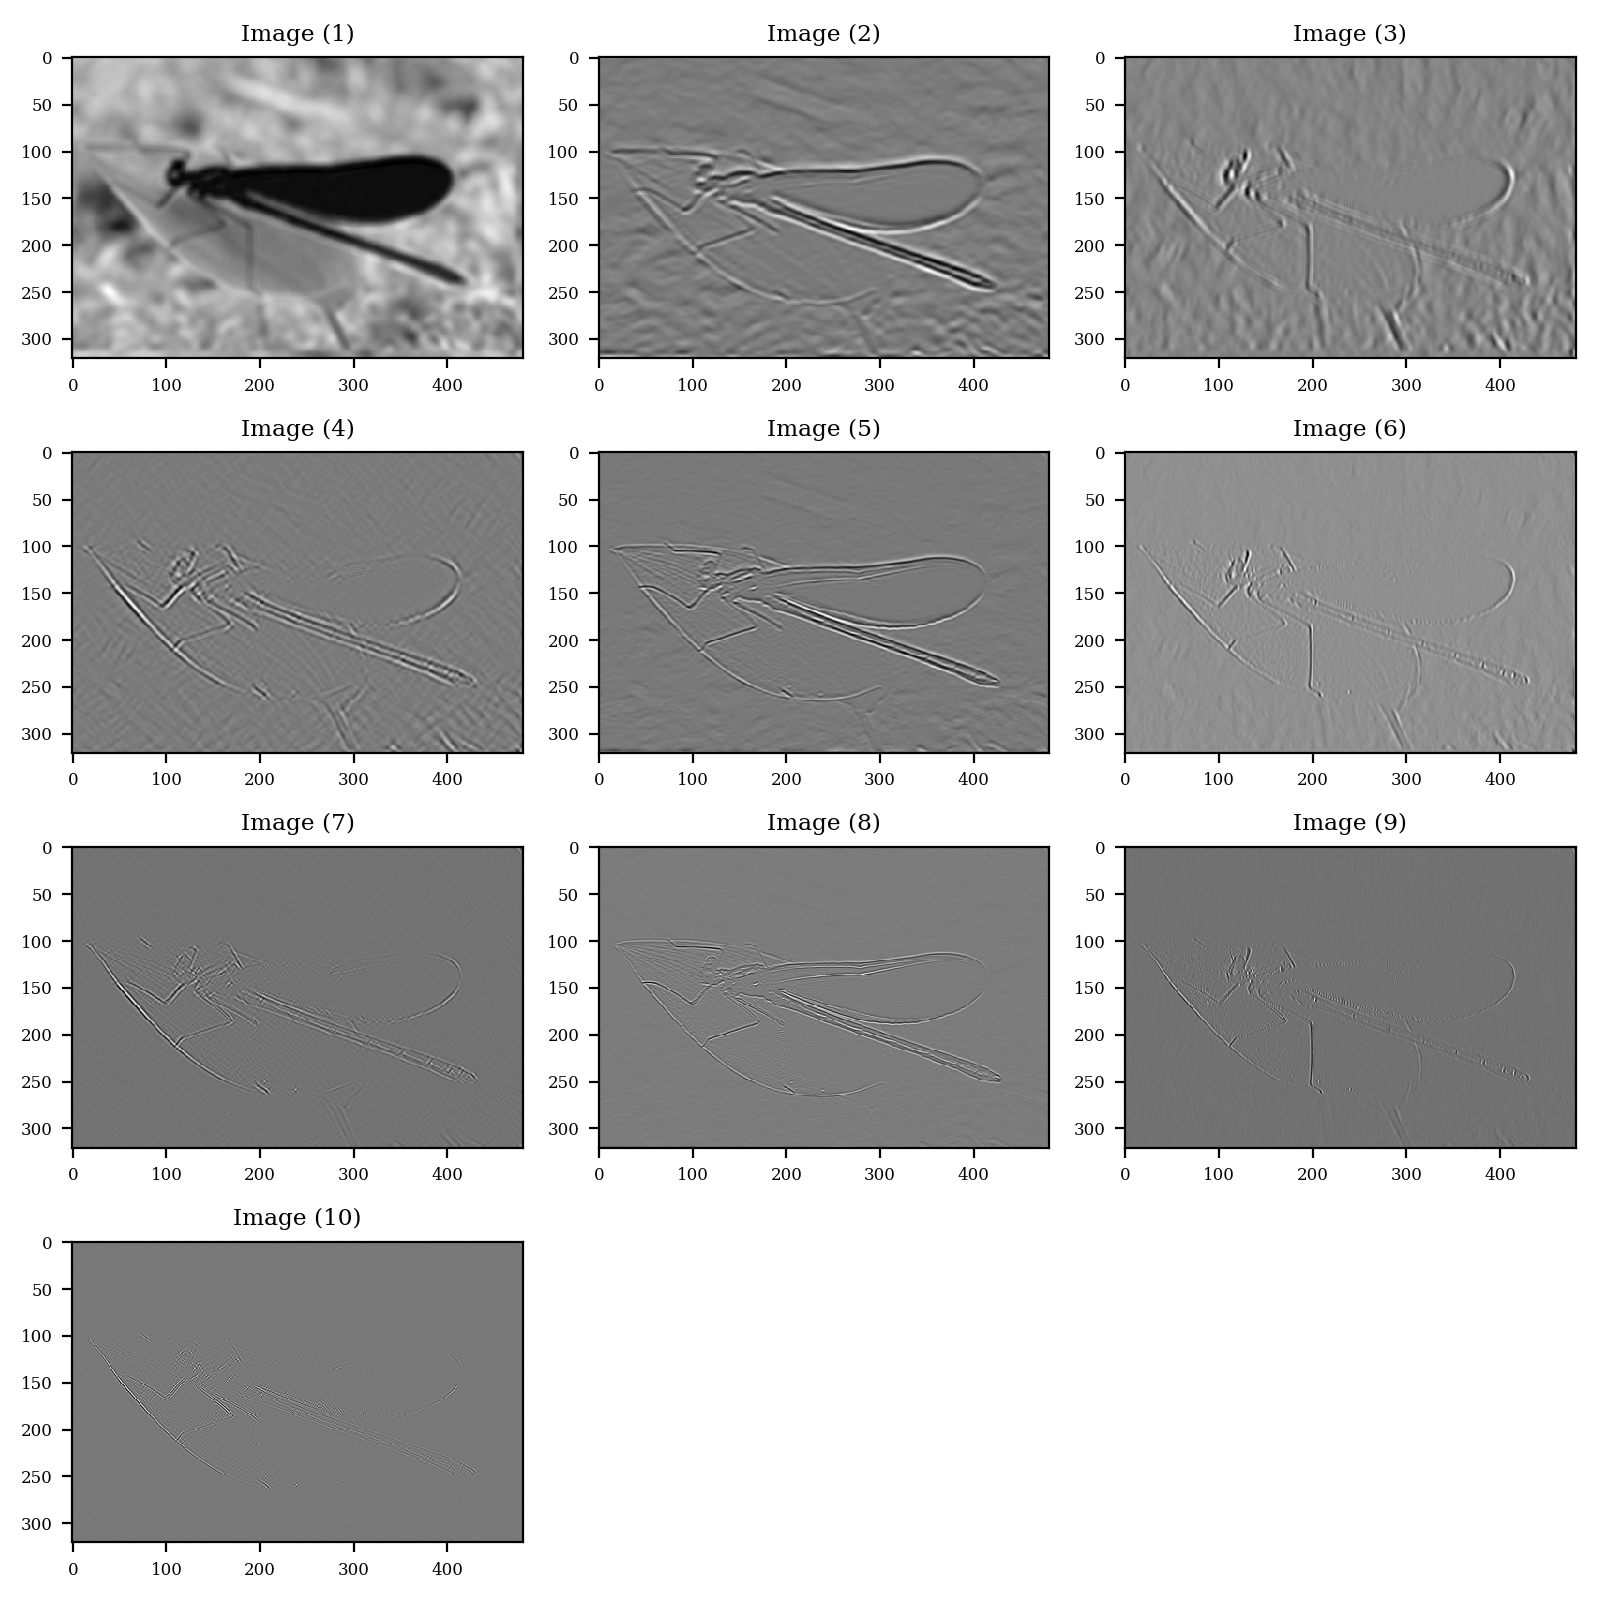

In [322]:
channel_1_images = []
for i in range(channel_1.shape[2]):
    channel_1_images.append(channel_1[:,:,i])
show_images(channel_1_images, cols = 4 )

<IPython.core.display.Javascript object>


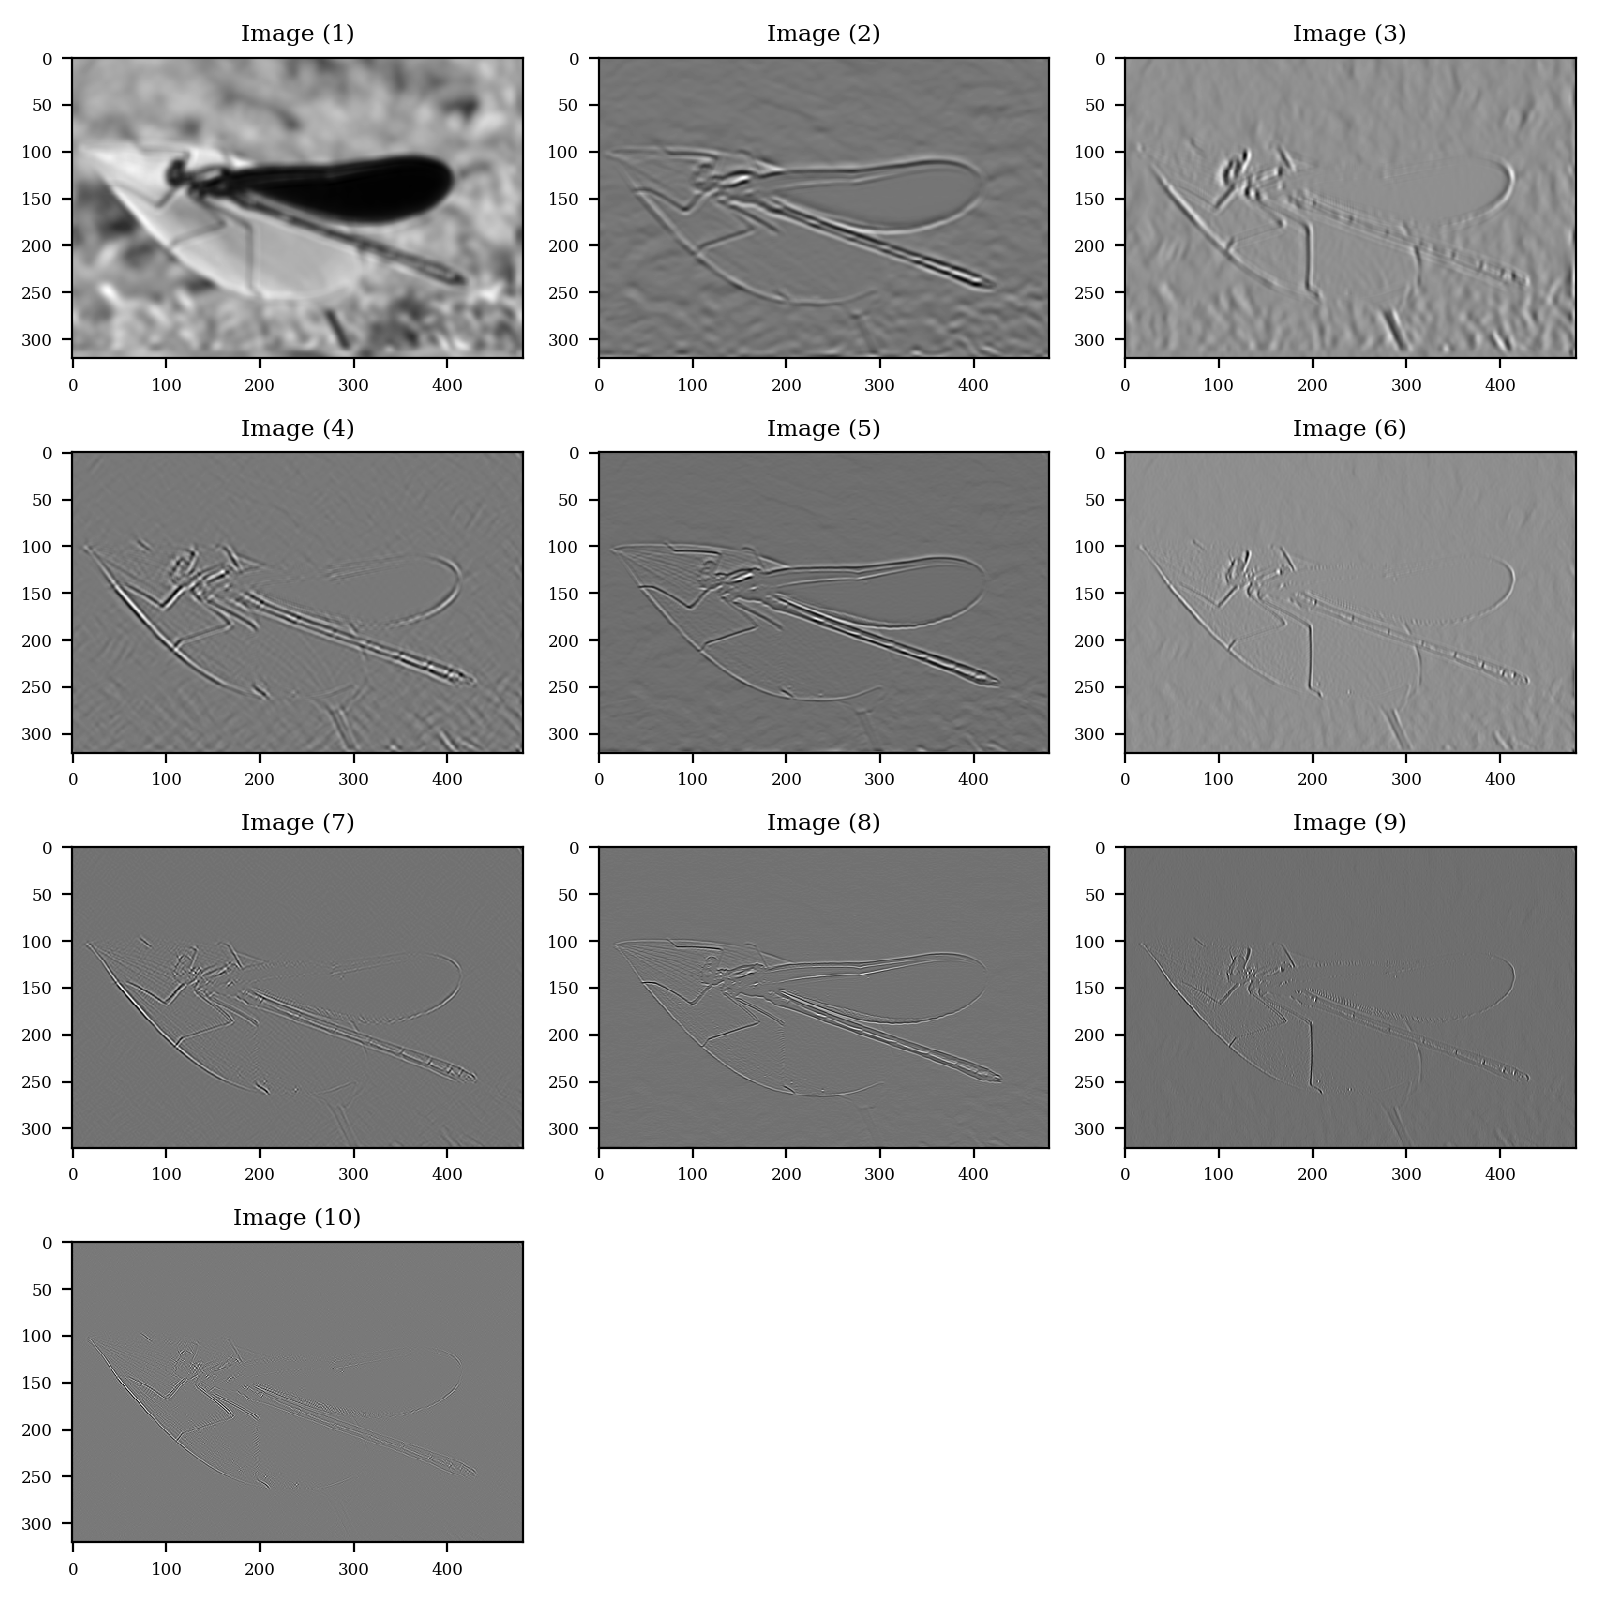

In [218]:
channel_2_images = []
for i in range(channel_2.shape[2]):
    channel_2_images.append(channel_2[:,:,i])
show_images(channel_2_images, cols = 4 )

<IPython.core.display.Javascript object>


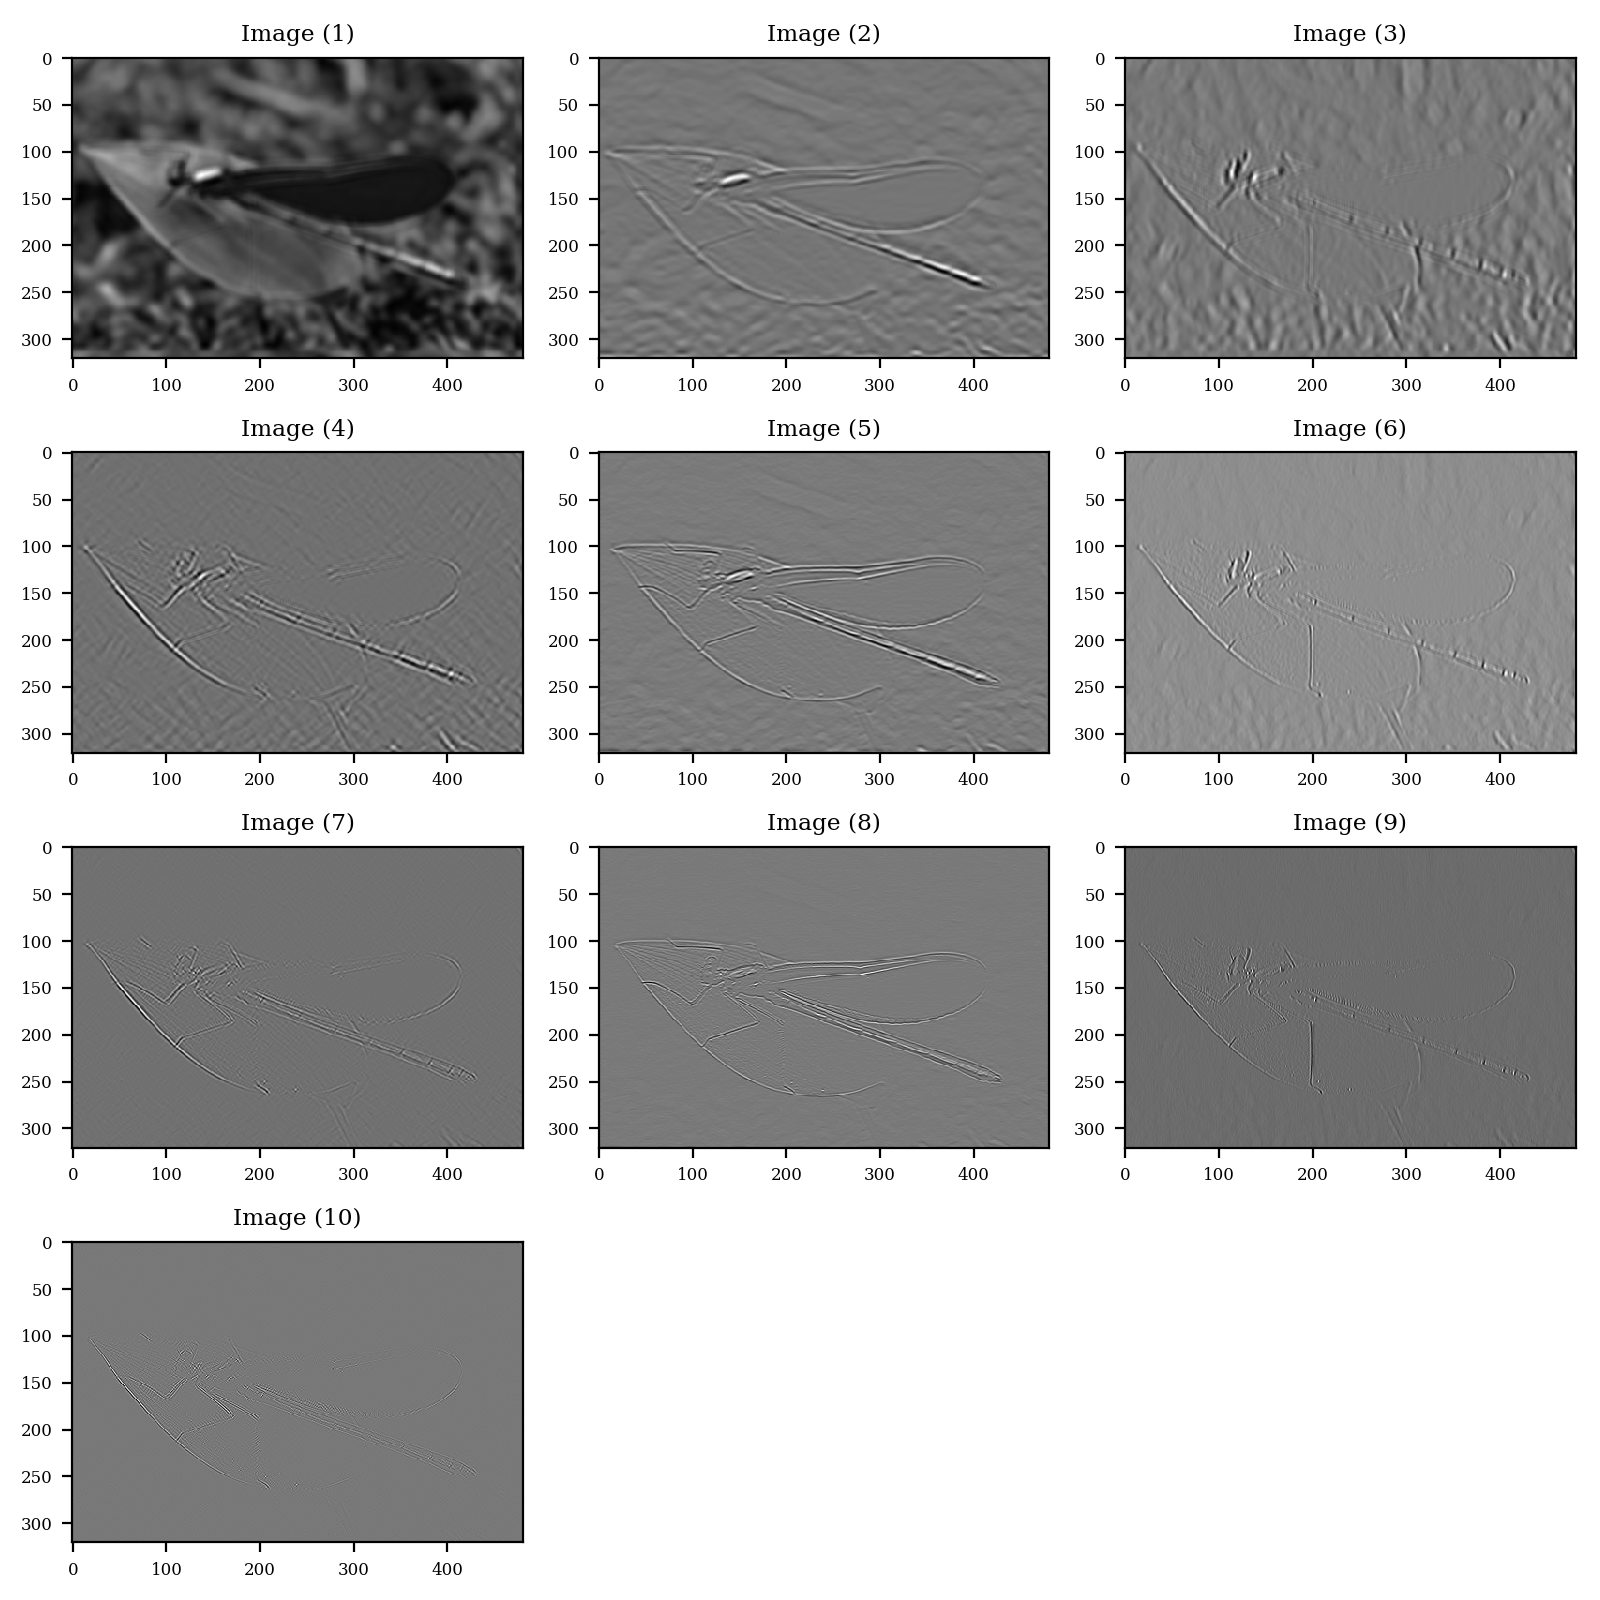

In [219]:
channel_3_images = []
for i in range(channel_3.shape[2]):
    channel_3_images.append(channel_3[:,:,i])
show_images(channel_3_images, cols = 4 )

DWT transforms discrete signal from time domain to frequency domain i.e., it provides time and
frequency representation of the signal. The signal to be decomposed is analyzed at different frequency
bands with different resolution. The decomposition takes place by transmitting the signal to a series of
HPF and LPF. In this case we used the Daubechies Wavelet, these are family of orthogonal wavelets defining a DWT and are characterized by a maximal number of vanishing moments for some given support, vanishing points correspond to better representation of more complex signals. For db2, the wavelets used in this case has 2 vanishing points, so the representative domian of those wavelets are higher than db1, which is reflected in the structure of the coefficients of the wavelet transform in this question. We can see at higher scales, the details captured are at a higher and higher resolution amongst the representation, this is due to the repeating low pass and high pass filtering performed at each scale in frequency space and decimation in image space. This results in all the possible combinations of low-pass and high-pass filtering as we increase in scale, which leads to better representation of the signal as we increase the complexity of the wavelet transform. In essence, the wavelet transform tries to combine the best of the frequency world and the spatial world by making a compromise between them in the form of the wavelets used. 

# 17

In [220]:
def iudwt(z, J, h, g):
    if J == 0:
        return z[:, :, 0]
    h2 = np.zeros((2*h.shape[0]-1,1))
    g2 = np.zeros((2*g.shape[0]-1,1))
    h2[::2] = h
    g2[::2] = g
    coarse = iudwt(z[:, :, :-3], J - 1, h2, g2)
    tmpg = im6.convolve(coarse, g[::-1]) + \
    im6.convolve(z[:, :, -3], h[::-1])
    tmph = im6.convolve(z[:, :, -2], g[::-1]) + \
    im6.convolve(z[:, :, -1], h[::-1])
    x = (np.swapaxes(im6.convolve(np.swapaxes(tmpg,0,1), g[::-1]),0,1) + np.swapaxes(im6.convolve(np.swapaxes(tmph,0,1),h[::-1]),0,1))/2
    return x

# 18

In [221]:
J = 2

transform = udwt(x0[:,:,0], J, h, g)
inverse = iudwt(transform, J, h, g )
transform_again = udwt(inverse, J, h, g)
print('Check for left inverse(J = 2): ', np.allclose(x0[:,:,0], inverse))
print('Check for right inverse(J = 2): ', np.allclose(transform, transform_again))

J = 3

transform = udwt(x0[:,:,0], J, h, g)
inverse = iudwt(transform, J, h, g )
transform_again = udwt(inverse, J, h, g)
print('Check for left inverse(J = 3): ', np.allclose(x0[:,:,0], inverse))
print('Check for right inverse(J = 3): ', np.allclose(transform, transform_again))

J = 4

transform = udwt(x0[:,:,0], J, h, g)
inverse = iudwt(transform, J, h, g )
transform_again = udwt(inverse, J, h, g)
print('Check for left inverse(J = 4): ', np.allclose(x0[:,:,0], inverse))
print('Check for right inverse(J = 4): ', np.allclose(transform, transform_again))

Check for left inverse(J = 2):  True
Check for right inverse(J = 2):  False
Check for left inverse(J = 3):  True
Check for right inverse(J = 3):  False
Check for left inverse(J = 4):  True
Check for right inverse(J = 4):  False


In [225]:
image_directory = '/Users/derar/Downloads/assets/starfish.png'
y0 =  plt.imread(image_directory)
image_directory = '/Users/derar/Downloads/assets/dragonfly.png'
x0 =  plt.imread(image_directory )


filters = ['db1', 'db2', 'db4']

for i in filters:

    J = 2
    x = x0[:,:,0]
    y = udwt(y0[:,:,0],J,h,g)

    left_side = np.dot(udwt(x,J,h,g).flatten(),y.flatten())
    right_side = np.dot(x.flatten(), iudwt(y,J,h,g).flatten())
    print('Check iudwt is the adjoint of udwt(J = 2, Wavelet : %s):' %i, np.isclose(left_side, right_side))

    J = 3
    x = x0[:,:,0]
    y = udwt(y0[:,:,0],J,h,g)

    left_side = np.dot(udwt(x,J,h,g).flatten(),y.flatten())
    right_side = np.dot(x.flatten(), iudwt(y,J,h,g).flatten())
    print('Check iudwt is the adjoint of udwt(J = 3, Wavelet : %s):' %i, np.isclose(left_side, right_side))

    J = 4
    x = x0[:,:,0]
    y = udwt(y0[:,:,0],J,h,g)

    left_side = np.dot(udwt(x,J,h,g).flatten(),y.flatten())
    right_side = np.dot(x.flatten(), iudwt(y,J,h,g).flatten())
    print('Check iudwt is the adjoint of udwt(J = 4, Wavelet : %s):' %i,np.isclose(left_side, right_side))


Check iudwt is the adjoint of udwt(J = 2, Wavelet : db1): True
Check iudwt is the adjoint of udwt(J = 3, Wavelet : db1): True
Check iudwt is the adjoint of udwt(J = 4, Wavelet : db1): True
Check iudwt is the adjoint of udwt(J = 2, Wavelet : db2): True
Check iudwt is the adjoint of udwt(J = 3, Wavelet : db2): True
Check iudwt is the adjoint of udwt(J = 4, Wavelet : db2): True
Check iudwt is the adjoint of udwt(J = 2, Wavelet : db4): True
Check iudwt is the adjoint of udwt(J = 3, Wavelet : db4): True
Check iudwt is the adjoint of udwt(J = 4, Wavelet : db4): True


# 19

In [514]:
def udwt_create_fb(n1, n2, J, h, g, ndim=3):
    if J == 0:
        return np.ones((n1, n2, 1, *[1] * (ndim - 2)))
    
    h2 = np.zeros((2*h.shape[0]-1,1))
    g2 = np.zeros((2*g.shape[0]-1,1))
    h2[::2] = h
    g2[::2] = g
    fbrec = udwt_create_fb(n1, n2, J - 1, h2, g2, ndim=ndim)
    gf1 = im6.kernel2fft(g,n1,1)
    hf1 = im6.kernel2fft(h,n1,1)
    gf2 = im6.kernel2fft(g,n2,1)
    hf2 = im6.kernel2fft(h,n2,1)
   
    fb = np.zeros((n1, n2, 4), dtype=np.complex128)
    fb[:, :, 0] = np.outer(gf1, gf2) / 2
    fb[:, :, 1] = np.outer(gf1, hf2) / 2
    fb[:, :, 2] = np.outer(hf1, gf2) / 2
    fb[:, :, 3] = np.outer(hf1, hf2) / 2
    fb = fb.reshape(n1, n2, 4, *[1] * (ndim - 2))
    fb = np.concatenate((fb[:, :, 0:1] * fbrec, fb[:, :, -3:]),
    axis=2)
    return fb



def fb_apply(x, fb):
    
    x = nf.fft2(x, axes=(0, 1))
    if x.ndim == 3:
        z = fb * x[:, :, np.newaxis,:]
    else:
        z = fb * x[:, :, np.newaxis]
    z = np.real(nf.ifft2(z, axes=(0, 1)))
    for i in range(1,fb.shape[2],int((fb.shape[2]-1)/3)):
        temp = np.copy(z[:,:,i])
        z[:,:,i] = z[:,:,i+1]
        z[:,:,i+1] = temp
    return z

def fb_adjoint(z, fb):
    z = nf.fft2(z, axes=(0, 1))
    x = (np.conj(fb) * z).sum(axis=2)
    x = np.real(nf.ifft2(x, axes=(0, 1)))
    return x

In [527]:
image_directory = '/Users/derar/Downloads/assets/dragonfly.png'
x0 =  plt.imread(image_directory )
n1, n2 = x0.shape[:2]
banks = udwt_create_fb(n1,n2,3,h,g,ndim=2)
transformed = fb_apply(x0[:,:,0], banks)
print(transformed.shape)

(321, 481, 10)


<IPython.core.display.Javascript object>


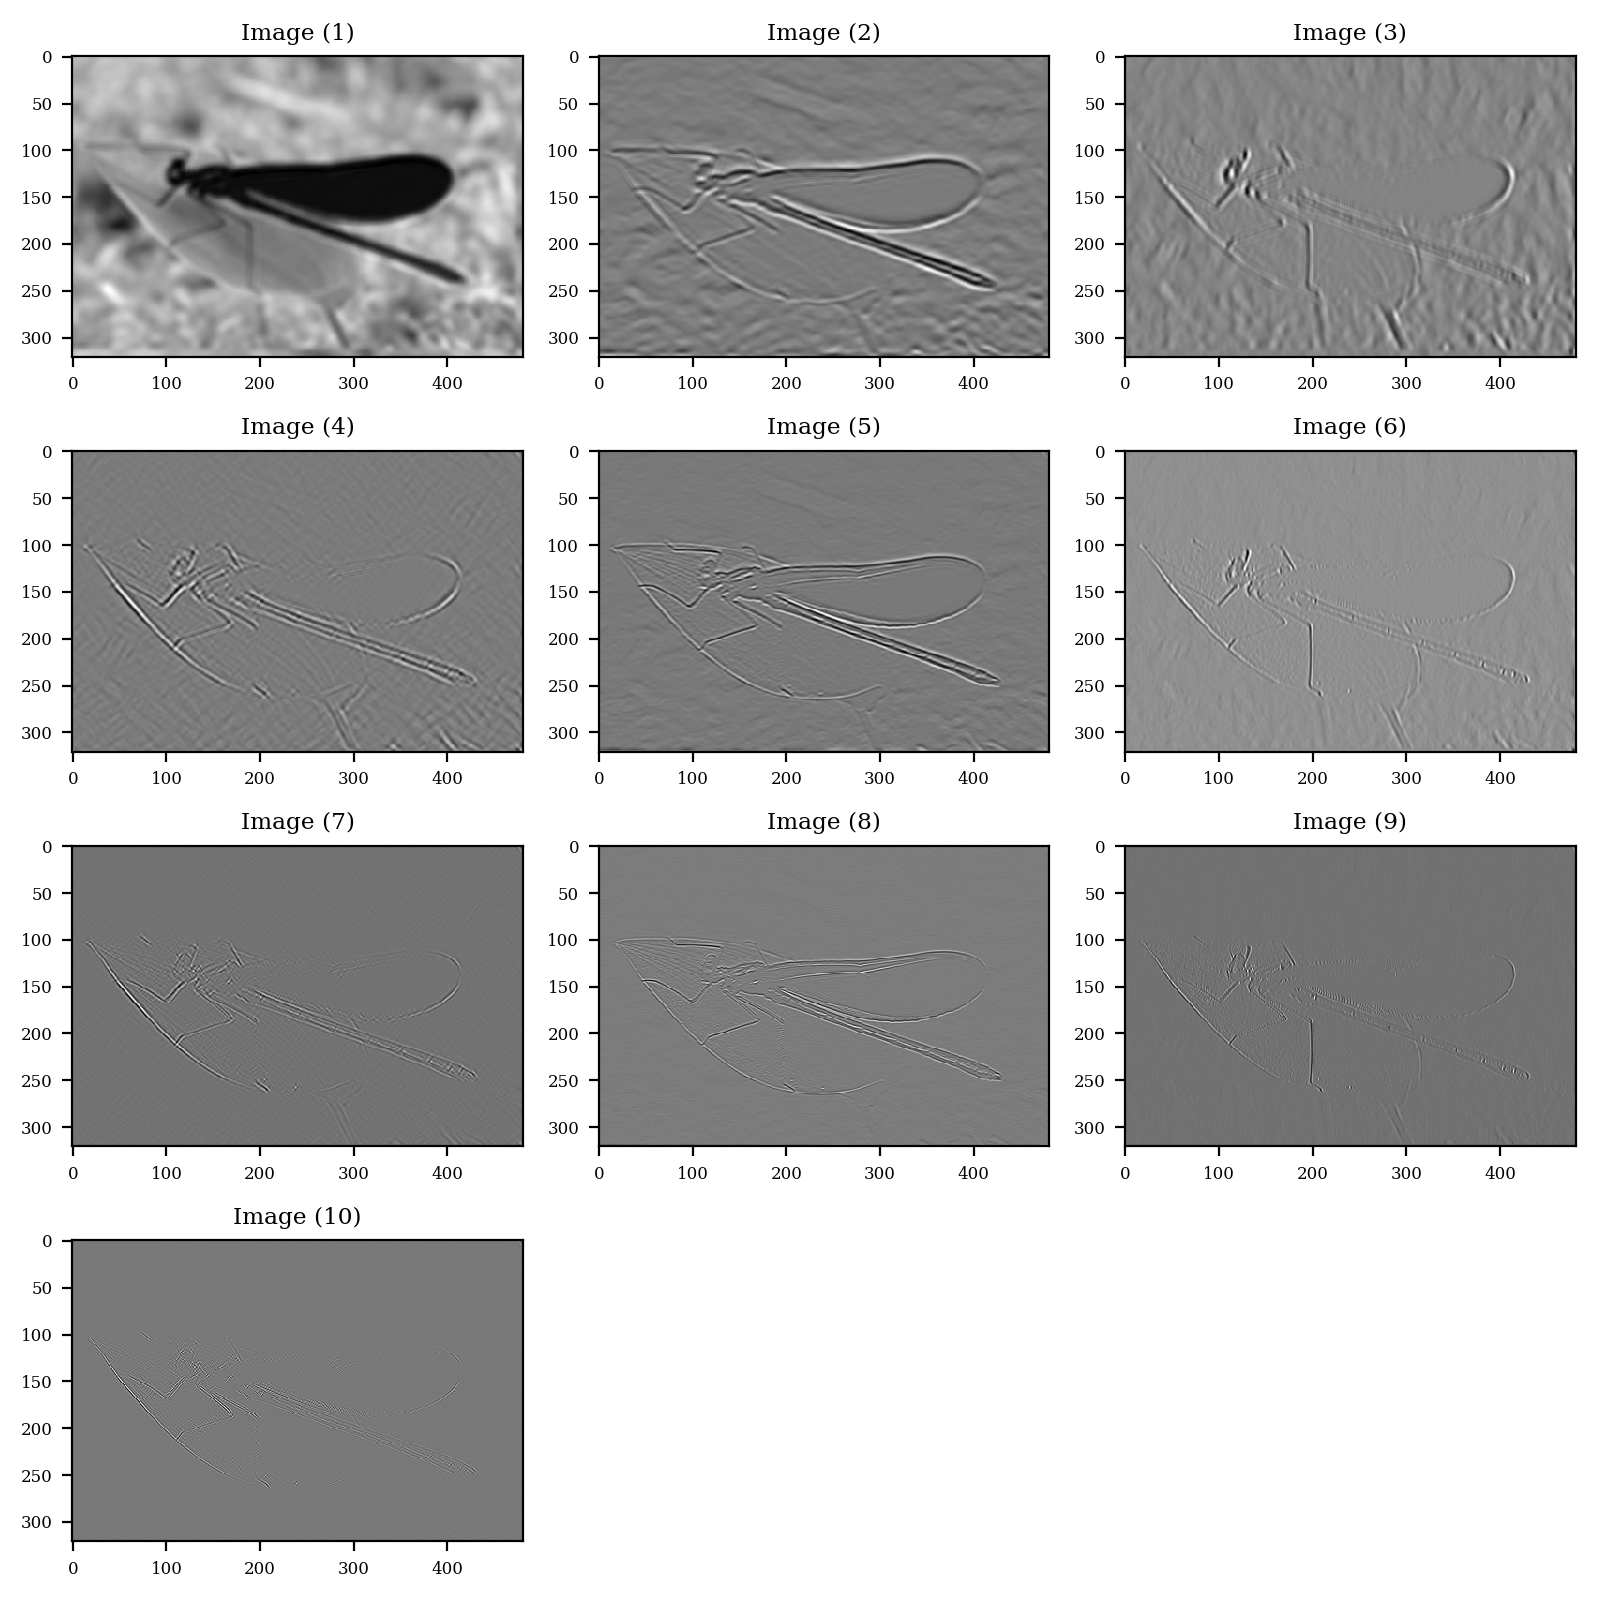

In [528]:
channel_1_images = []
for i in range(transformed.shape[2]):
    channel_1_images.append(transformed[:,:,i])
show_images(channel_1_images, cols = 4 )

In [529]:
h,g = im.wavelet('db2')
image_directory = '/Users/derar/Downloads/assets/dragonfly.png'
x0 =  plt.imread(image_directory )

channel_1 = udwt(x0[:,:,0],3,h,g)
channel_2 = udwt(x0[:,:,1],3,h,g)
channel_3 = udwt(x0[:,:,2],3,h,g)


transformed_1 = fb_apply(x0[:,:,0], banks)
transformed_2 = fb_apply(x0[:,:,1], banks)
transformed_3 = fb_apply(x0[:,:,2], banks)



In [526]:
print('Filter banks method and convolution method equivalent?: ', np.allclose(channel_1,transformed_1,atol = 1e-6))
print('Filter banks method and convolution method equivalent?: ', np.allclose(channel_2,transformed_2,atol = 1e-6))
print('Filter banks method and convolution method equivalent?: ', np.allclose(channel_3,transformed_3,atol = 1e-6))

Filter banks method and convolution method equivalent?:  True
Filter banks method and convolution method equivalent?:  True
Filter banks method and convolution method equivalent?:  True


# 20

In [110]:
from imagetools import projectC as c

In [534]:
class UDWT(im.LinearOperator):
    
    def __init__(self, shape, J, name = 'db2' , using_fb = True):
    
        self.__ishape = shape
        self.__using_fb = using_fb
        self.__J = J
        h, g = self.wavelet(name)
        self.__h = h
        self.__g = g
        LinearOperator.__init__(self, shape, shape)
        
    

    def iudwt(self, z):
        h = self.__h
        g = self.__g
        J = self.__J
        if J == 0:
            return z[:, :, 0]
        h2 = np.zeros((2*h.shape[0]-1,1))
        g2 = np.zeros((2*g.shape[0]-1,1))
        h2[::2] = h
        g2[::2] = g
        self.__h = h2
        self.__g = g2
        self.__J = J - 1
        coarse = self.iudwt(z[:, :, :-3])
        tmpg = convolve(coarse, g[::-1]) + convolve(z[:, :, -3], h[::-1])
        tmph = convolve(z[:, :, -2], g[::-1]) + convolve(z[:, :, -1], h[::-1])
        x = (np.swapaxes(convolve(np.swapaxes(tmpg,0,1), g[::-1]),0,1) + np.swapaxes(convolve(np.swapaxes(tmph,0,1),h[::-1]),0,1))/2
        self.__h = h
        self.__g = g
        self.__J = J
        return x


    def __call__(self, x):
        h = self.__h
        g = self.__g
        J = self.__J
        if self.__using_fb == True :
            filter_bank = self.udwt_create_fb()
            return self.fb_apply(x, filter_bank)
        if J == 0:
            return x[:, :, np.newaxis]
        tmph = np.swapaxes(convolve(np.swapaxes(x,0,1), h),0,1) / 2
        tmpg = np.swapaxes(convolve(np.swapaxes(x,0,1), g),0,1) / 2
        detail = np.stack((convolve(tmpg, h),
        convolve(tmph, g),
        convolve(tmph, h)), axis=2)
        coarse = convolve(tmpg, g)
        h2 = np.zeros((2*h.shape[0]-1,1))
        g2 = np.zeros((2*g.shape[0]-1,1))
        h2[::2] = h
        g2[::2] = g
        self.__h = h2
        self.__g = g2
        self.__J = J - 1
        z = np.concatenate((self.udwt(coarse), detail), axis=2)
        self.__h = h
        self.__g = g
        self.__J = J
        return z


    def udwt_create_fb(self, ndim=3):
        h = self.__h
        g = self.__g
        J = self.__J
        ishape = self.__ishape
        n1, n2 = ishape[:2]
        if J == 0:
            return np.ones((n1, n2, 1, *[1] * (ndim - 2)))
        h2 = np.zeros((2*self.__h.shape[0]-1,1))
        g2 = np.zeros((2*self.__g.shape[0]-1,1))
        h2[::2] = h
        g2[::2] = g
        self.__h = h2
        self.__g = g2
        self.__J = self.__J - 1
        fbrec = self.udwt_create_fb(ndim = ndim)
        gf1 = kernel2fft(g,n1,1)
        hf1 = kernel2fft(h,n1,1)
        gf2 = kernel2fft(g.T,1,n2)
        hf2 = kernel2fft(h.T,1,n2)
        fb = np.zeros((n1, n2, 4), dtype=np.complex128)
        fb[:, :, 0] = np.outer(gf1, gf2) / 2
        fb[:, :, 1] = np.outer(gf1, hf2) / 2
        fb[:, :, 2] = np.outer(hf1, gf2) / 2
        fb[:, :, 3] = np.outer(hf1, hf2) / 2
        fb = fb.reshape(n1, n2, 4, *[1] * (ndim - 2))
        fb = np.concatenate((fb[:, :, 0:1] * fbrec, fb[:, :, -3:]),
        axis=2)
        self.__h = h
        self.__g = g
        self.__J = J
        return fb

    def fb_apply(x, fb):
    
        x = nf.fft2(x, axes=(0, 1))
        if x.ndim == 3:
            z = fb * x[:, :, np.newaxis,:]
        else:
            z = fb * x[:, :, np.newaxis]
        z = np.real(nf.ifft2(z, axes=(0, 1)))
        for i in range(1,fb.shape[2],int((fb.shape[2]-1)/3)):
            temp = np.copy(z[:,:,i])
            z[:,:,i] = z[:,:,i+1]
            z[:,:,i+1] = temp
        return z

    def fb_adjoint(self, z, fb):
        z = nf.fft2(z, axes=(0, 1))
        x = (np.conj(fb) * z).sum(axis=2)
        x = np.real(nf.ifft2(x, axes=(0, 1)))
        return x

    def invert(self, x):
        return np.linalg.pinv(x)
        
    
    def power(self):
        return udwt_power(self.__J)

    def adjoint(self, x):
        return self.iudwt(x)

    def gram(self, x):
        return self.adjoint(self.__call__(x))

    def gram_resolvent(self, x, tau):
        #return cg(lambda z: z + tau * self.gram(z), x)
        # reduced to:
        #return cg(lambda z: z + tau * self.gram(z), x)
        return x/(1+tau)
    
    def wavelet(name, d=2):
    

        if name in ('haar', 'db1'):
            h = np.array([-1, 1])
        if name is 'db2':
            h = np.array([1, np.sqrt(3), -(3 + 2 * np.sqrt(3)), 2 + np.sqrt(3)])
        if name is 'db4':
            h = np.array(
                [-0.230377813308855230, +0.714846570552541500, -0.630880767929590400,
                 -0.027983769416983850, +0.187034811718881140, +0.030841381835986965,
                 -0.032883011666982945, -0.010597401784997278])
        if name is 'db8':
            h = np.array(
                [-0.0544158422, +0.3128715909, -0.6756307363, +0.5853546837,
                 +0.0158291053, -0.2840155430, -0.0004724846, +0.1287474266,
                 +0.0173693010, -0.0440882539, -0.0139810279, +0.0087460940,
                 +0.0048703530, -0.0003917404, -0.0006754494, -0.0001174768])
        if name is 'sym4':
            h = np.array(
                [-0.03222310060404270, -0.012603967262037833, +0.09921954357684722,
                 +0.29785779560527736, -0.803738751805916100, +0.49761866763201545,
                 +0.02963552764599851, -0.075765714789273330])
        if name is 'coif4':
            h = np.array(
                [-0.00089231366858231460, -0.00162949201260173260, +0.00734616632764209350,
                 +0.01606894396477634800, -0.02668230015605307200, -0.08126669968087875000,
                 +0.05607731331675481000, +0.41530840703043026000, -0.78223893092049900000,
                 +0.43438605649146850000, +0.06662747426342504000, -0.09622044203398798000,
                 -0.03933442712333749000, +0.02508226184486409700, +0.01521173152794625900,
                 -0.00565828668661072000, -0.00375143615727845700, +0.00126656192929894450,
                 +0.00058902075624433830, -0.00025997455248771324, -6.2339034461007130e-05,
                 +3.1229875865345646e-05, +3.2596802368833675e-06, -1.7849850030882614e-06])
        h = h / np.sqrt(np.sum(h**2))
        g = (-1)**(1 + np.arange(h.shape[0])) * h[::-1]
        h = np.concatenate((h, np.array([0.])))
        g = np.concatenate((g, np.array([0.])))
        h = h.reshape(-1, *[1] * (d - 1))
        g = g.reshape(-1, *[1] * (d - 1))
        return h, g


    def udwt_power(J, ndim=3):
        
        

        p = ((4)**J, )
        for j in range(1, J+1):
            p += ((4)**(J - j), ) * 3
        p = np.array(p, dtype=np.float32).reshape(1, 1, -1, *[1] * (ndim - 2))
        p[:, :, 1:] *= 2
        return p

In [533]:
from imagetools import projectC as c
J = 3 
image_directory = '/Users/derar/Downloads/assets/dragonfly.png'
x0 =  plt.imread(image_directory )
shape = x0.shape[:2]

W_method1 = c.UDWT(shape, J, 'db2', using_fb = True)
W_method2 = c.UDWT(shape, J, 'db2', using_fb = False)


# 21